<a href="https://colab.research.google.com/github/Dyinastie/PVCK_3D_Dyinastie/blob/main/PCVK_Jobsheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import folder Drive**

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import Library**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

**3. Histogram gambar lena.jpg**

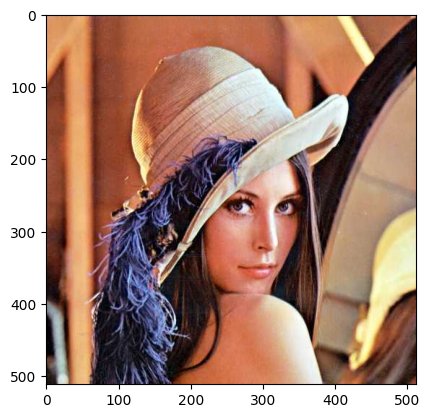

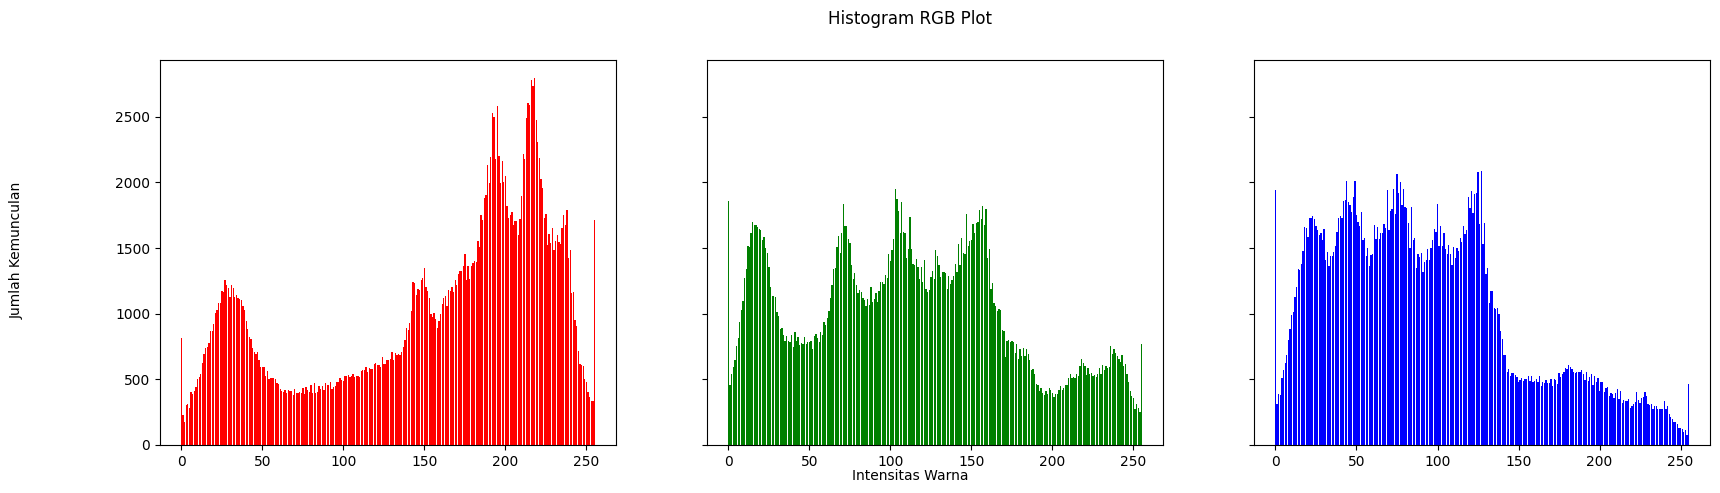

In [ ]:
# 1. Input image
image = cv.imread('/content/drive/MyDrive/Images/Lena.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

# 2. Menghitung jumlah kemunculan setiap warna pixel
# Pisahkan channel gambar (BGR)
b, g, r = cv.split(image)
# Buat array kosong untuk menyimpan histogram
hist_b = np.zeros(256, dtype=int)
hist_g = np.zeros(256, dtype=int)
hist_r = np.zeros(256, dtype=int)
# Iterasi melalui setiap piksel untuk menghitung jumlah kemunculan intensitas warna
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        hist_r[r[i, j]] += 1
        hist_g[g[i, j]] += 1
        hist_b[b[i, j]] += 1

# 3. Membuat histogram
intensity_range = np.arange(256)  # Membuat rentang intensitas warna dari 0-255
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Membuat histogram merah, hijau, dan biru
axs[0].bar(intensity_range, hist_r, color='red')
axs[1].bar(intensity_range, hist_g, color='green')
axs[2].bar(intensity_range, hist_b, color='blue')

# 4. Menampilkan Histogram citra
plt.show()

**4. Histogram gambar lena.jpg dengan library numpy "Histogram"**

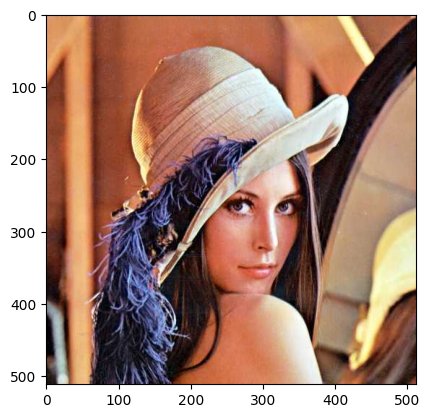

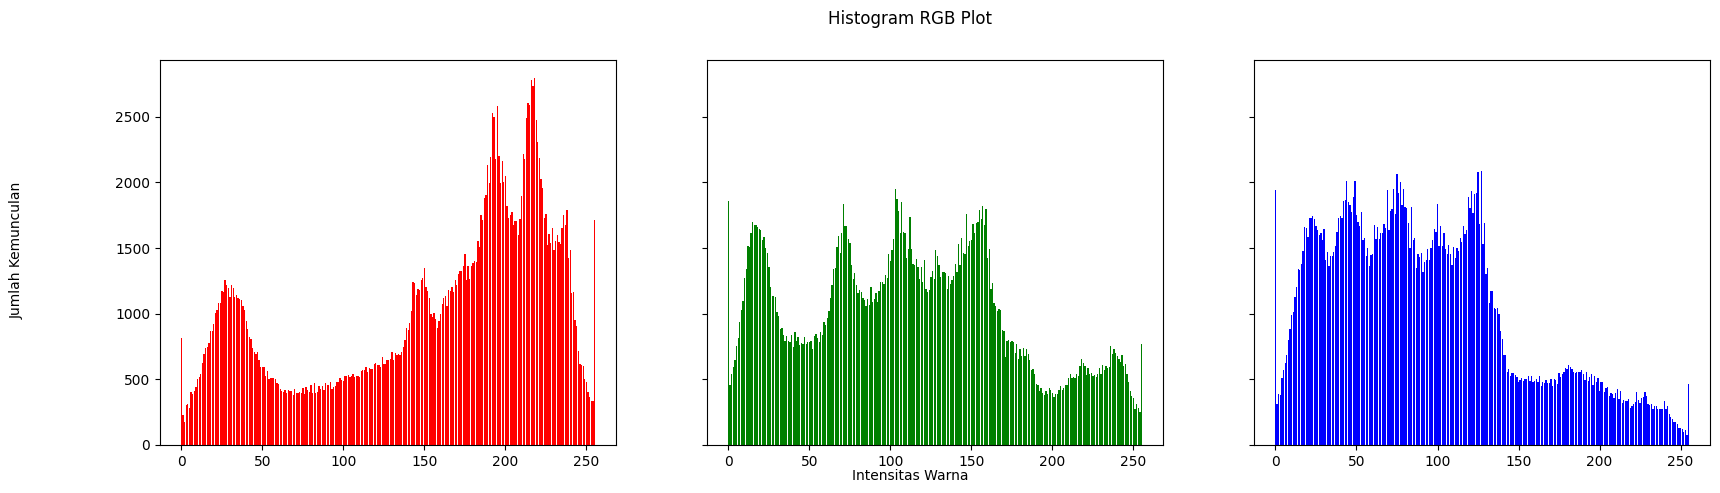

In [ ]:
# 1. Input image
image = cv.imread('/content/drive/MyDrive/Images/Lena.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

# 2. Menghitung jumlah kemunculan setiap warna pixel menggunakan numpy.histogram
# Pisahkan channel gambar (BGR)
b, g, r = cv.split(image)
# Menggunakan numpy.histogram untuk menghitung histogram setiap channel
hist_r, _ = np.histogram(r, bins=256, range=(0, 256))
hist_g, _ = np.histogram(g, bins=256, range=(0, 256))
hist_b, _ = np.histogram(b, bins=256, range=(0, 256))

# 3. Membuat histogram
intensity_range = np.arange(256)  # Membuat rentang intensitas warna dari 0-255
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# Membuat histogram merah, hijau, dan biru
axs[0].bar(intensity_range, hist_r, color='red')
axs[1].bar(intensity_range, hist_g, color='green')
axs[2].bar(intensity_range, hist_b, color='blue')

# 4. Menampilkan Histogram citra
plt.show()


Apakah output muncul sama?

> Iya, ouput dari pembuatan histrogram pada nomor 2 dan 3 sama.

**5. Histogram equalization lena_lc.jpg**

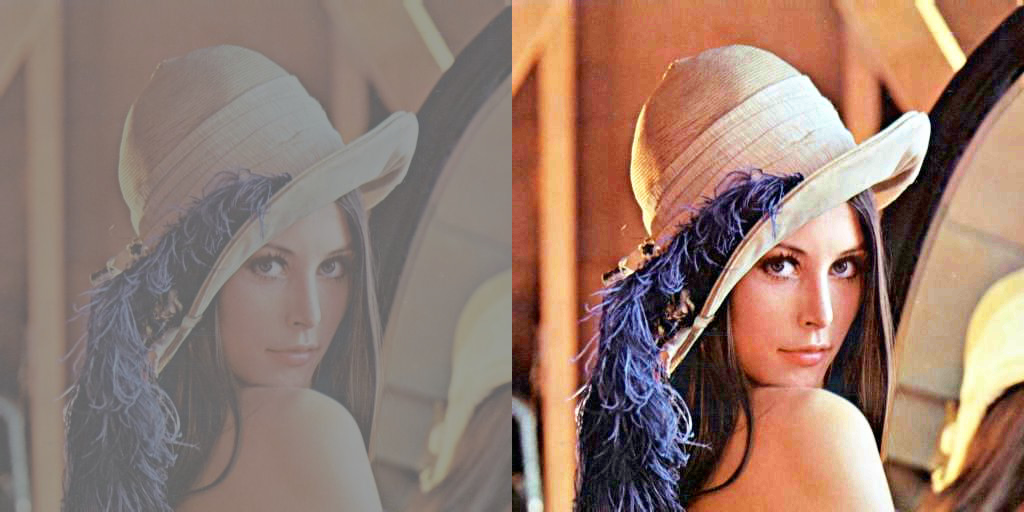

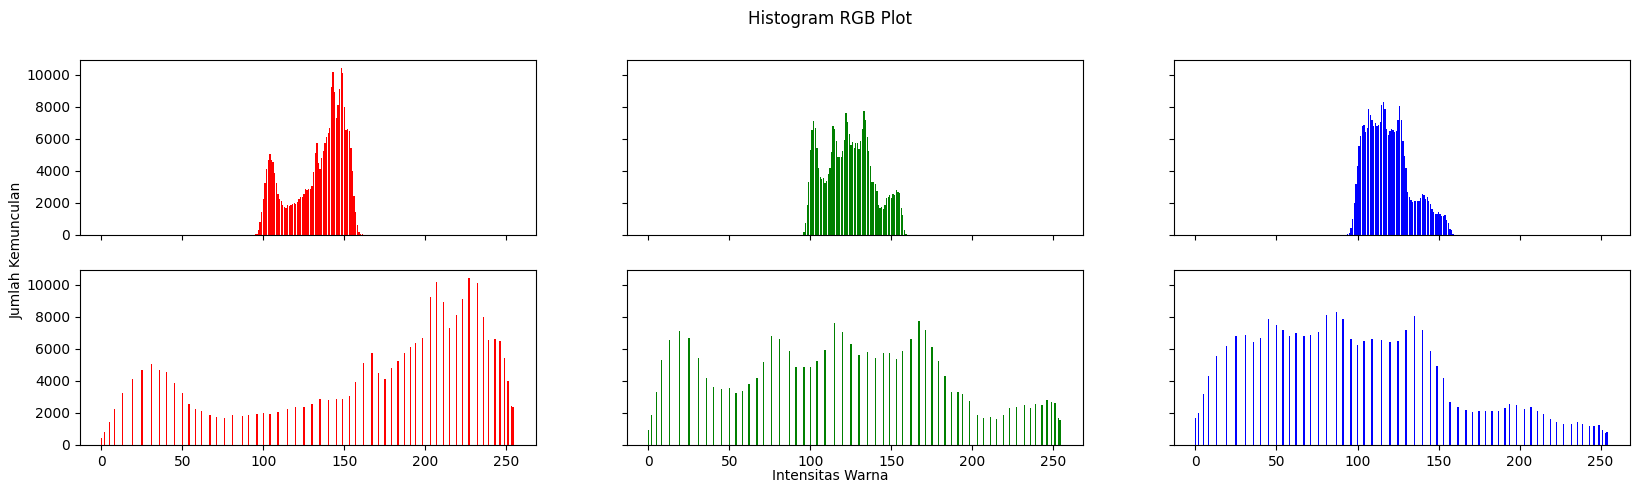

In [ ]:
# 1. Input image
img_lena_lc = cv.imread('/content/drive/MyDrive/Images/Lena_lc.jpg')

# 2. Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (frekuensi)
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(height):
        for x in range(width):
            ax[0][img[y][x][0]] += 1  # Merah
            ax[1][img[y][x][1]] += 1  # Hijau
            ax[2][img[y][x][2]] += 1  # Biru
    return ax

# Hitung histogram asli
histo_asli = histog(img_lena_lc)

# 3. Penjumlahan kumulatif dari frekuensi yang sudah diketahui
img_array = np.asarray(img_lena_lc)
histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)  # Total pixel
normalized_histogram = histogram_array / num_pixels  # Normalisasi frekuensi

# 4. Normalisasi dengan kumulatif frekuensi seluruh pixel
cumulative_histogram = np.cumsum(normalized_histogram)

# 5. Implementasikan rumus K0
transform_map = np.floor(255 * cumulative_histogram).astype(np.uint8)

# 6. Transformasi ke equalize
img_array = img_lena_lc.flatten()  # Rata-rata citra
eq_img_list = [transform_map[p] for p in img_array]  # Transformasi
eq_img_array = np.reshape(np.asarray(eq_img_list), img_lena_lc.shape)  # Bentuk citra

# Hitung histogram setelah equalization
equal_histo = histog(eq_img_array)

# 7. Citra hasil histogram equalization
final_frame = cv.hconcat((img_lena_lc, eq_img_array))
cv2_imshow(final_frame)

# 8. Menampilkan histogram RGB
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# Histogram asli
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
# Histogram hasil equalization
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()

**5. Histogram equalization lena_lc.jpg dengan library CV2 "equalizeHist"**

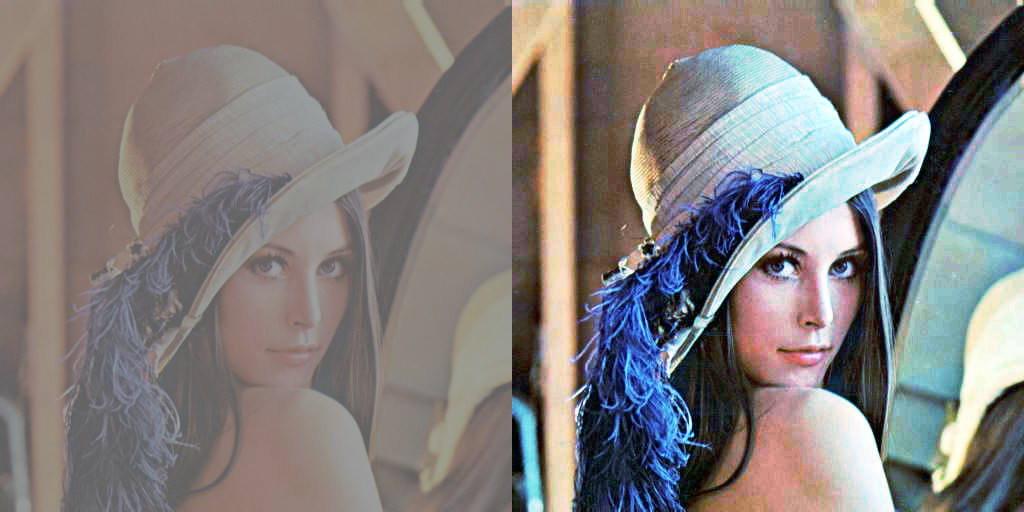

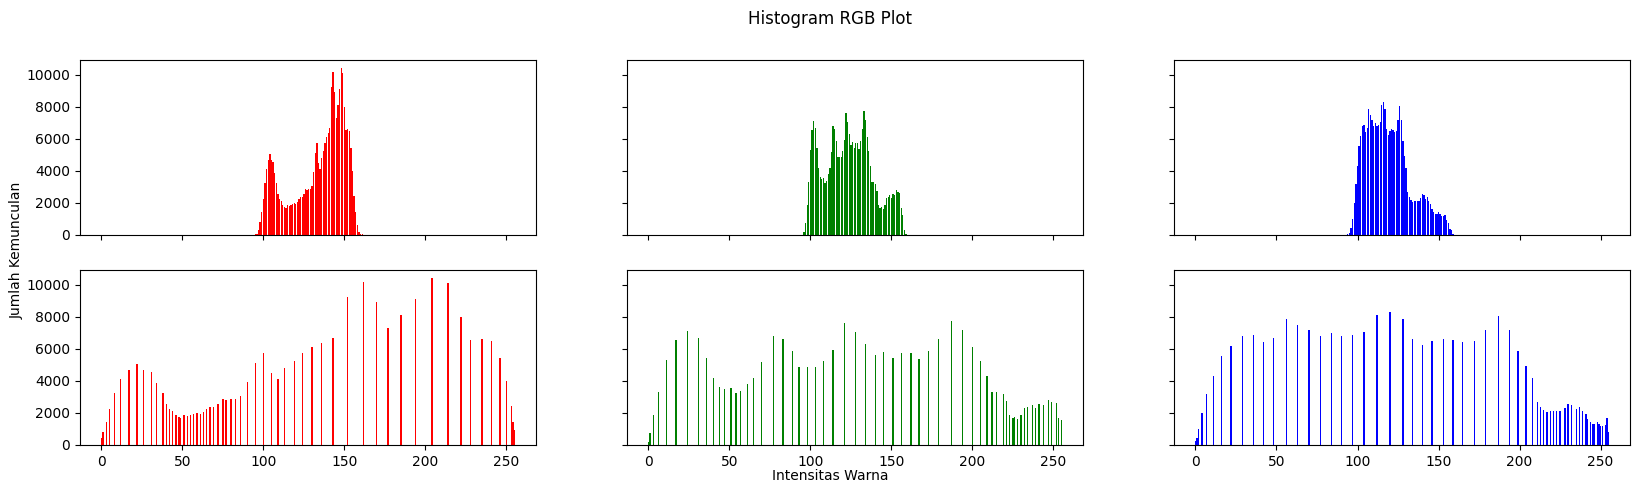

In [ ]:
# 1. Input image
img_lena_lc = cv.imread('/content/drive/MyDrive/Images/Lena_lc.jpg')

# 2. Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (frekuensi)
def histog(img):
    height, width, depth = img.shape
    ax = np.zeros((3, 256))  # Untuk menyimpan histogram untuk setiap channel
    for y in range(height):
        for x in range(width):
            ax[0][img[y][x][0]] += 1  # Merah
            ax[1][img[y][x][1]] += 1  # Hijau
            ax[2][img[y][x][2]] += 1  # Biru
    return ax

# Hitung histogram asli
histo_asli = histog(img_lena_lc)

# 3. Menggunakan OpenCV untuk histogram equalization untuk setiap channel
eq_img = np.zeros_like(img_lena_lc)  # Untuk menyimpan citra yang telah di-equalize
for i in range(3):  # 0: Merah, 1: Hijau, 2: Biru
    eq_img[:,:,i] = cv.equalizeHist(img_lena_lc[:,:,i])  # Equalisasi setiap channel

# Hitung histogram setelah equalization
equal_histo = histog(eq_img)

# 4. Citra hasil histogram equalization
final_frame = cv.hconcat((img_lena_lc, eq_img))
cv2_imshow(final_frame)

# 5. Menampilkan histogram RGB
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)  # Mengubah tinggi figure
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# Histogram asli
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
# Histogram hasil equalization
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')
plt.show()


Apakah output muncul sama?

> Tidak, output histogram equalizatiion secara manual pada nomor 5 berbeda dengan output histogram equalization dengan menggunakan library CV2 "equalizeHist" pada nomor 6.

**7. Pemetaan 16 juta warna RGB ke dalam 8 warna**

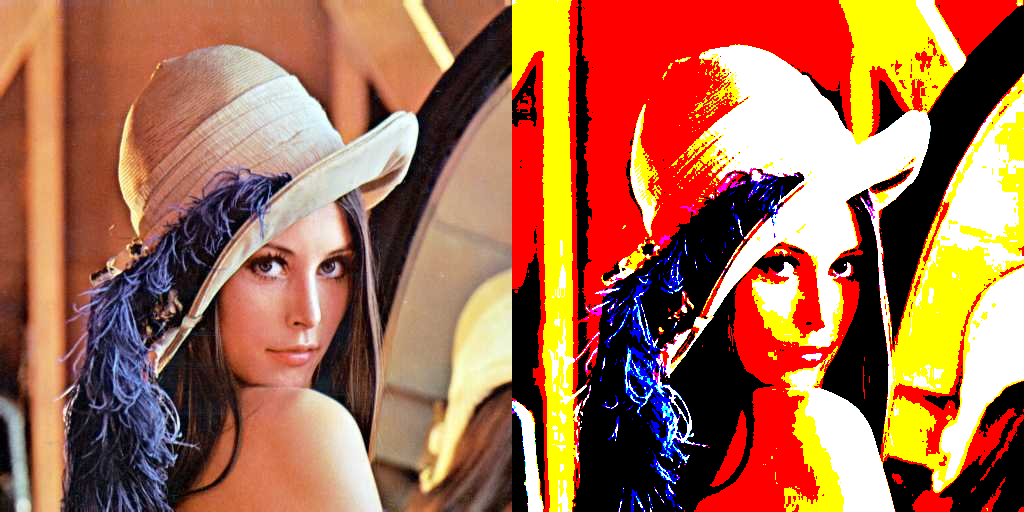

In [ ]:
# 1. Input image
img_lena = cv.imread('/content/drive/MyDrive/Images/Lena.jpg')

# 2. Fungsi pemetaan warna
def map_to_8_colors(pixel):
    r, g, b = pixel
    # Tentukan warna terdekat
    if (r < 128) and (g < 128) and (b < 128):
        return [0, 0, 0]  # Hitam
    elif (r >= 128) and (g < 128) and (b < 128):
        return [255, 0, 0]  # Merah
    elif (r < 128) and (g >= 128) and (b < 128):
        return [0, 255, 0]  # Hijau
    elif (r < 128) and (g < 128) and (b >= 128):
        return [0, 0, 255]  # Biru
    elif (r >= 128) and (g >= 128) and (b < 128):
        return [255, 255, 0]  # Kuning
    elif (r < 128) and (g >= 128) and (b >= 128):
        return [0, 255, 255]  # Cyan
    elif (r >= 128) and (g < 128) and (b >= 128):
        return [255, 0, 255]  # Magenta
    else:
        return [255, 255, 255]  # Putih

# 3. Menerapkan pemetaan pada gambar
height, width, _ = img_lena.shape
mapped_img = np.zeros_like(img_lena)

for y in range(height):
    for x in range(width):
        mapped_img[y, x] = map_to_8_colors(img_lena[y, x])

# 4. Menampilkan hasil
final_frame = cv.hconcat((img_lena, mapped_img))
cv2_imshow(final_frame)

**8. Proses dithering Floyd and Steinberg**

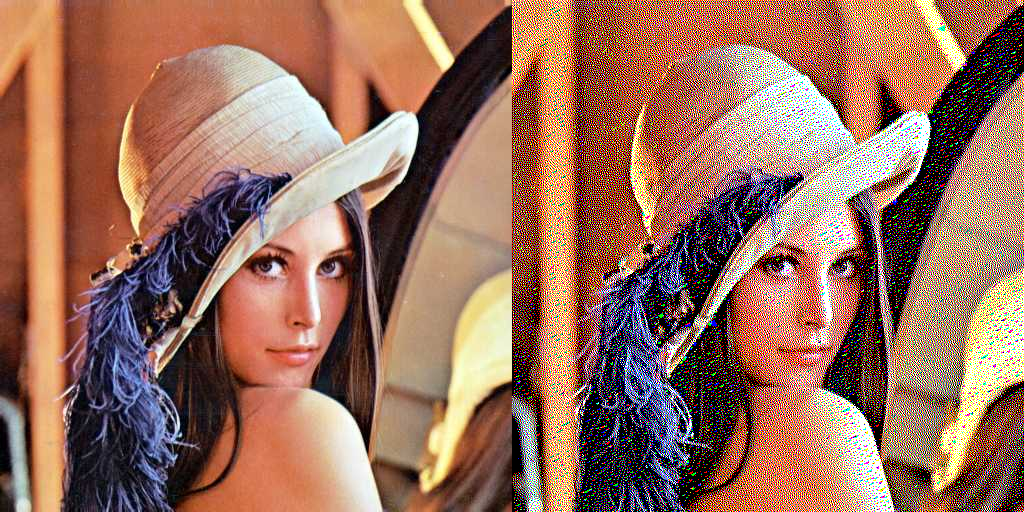

In [ ]:
# 1. Input image
img_lena = cv.imread('/content/drive/MyDrive/Images/Lena.jpg')\
# 2. Mengonversi ke Grayscale
img_gray = cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY)

# 3. Fungsi dithering Floyd-Steinberg
def floyd_steinberg_dithering(img):
        height, width = img.shape
        # Salin citra asli untuk hasil dithering
        dithered_img = img.copy()
        for y in range(height):
            for x in range(width):
                old_pixel = dithered_img[y, x]
                # Menentukan warna piksel
                new_pixel = 255 if old_pixel > 127 else 0
                dithered_img[y, x] = new_pixel
                # Menghitung kesalahan
                quant_error = old_pixel - new_pixel
                # Menyebarkan kesalahan ke piksel yang berdekatan
                if x + 1 < width:
                    dithered_img[y, x + 1] += quant_error * 7 / 16
                if x - 1 >= 0 and y + 1 < height:
                    dithered_img[y + 1, x - 1] += quant_error * 3 / 16
                if y + 1 < height:
                    dithered_img[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width and y + 1 < height:
                    dithered_img[y + 1, x + 1] += quant_error * 1 / 16
        return dithered_img

# 4. Memisahkan gambar menjadi saluran warna
b, g, r = cv.split(img_lena)

# Menerapkan dithering pada setiap saluran warna
dithered_b = floyd_steinberg_dithering(b)
dithered_g = floyd_steinberg_dithering(g)
dithered_r = floyd_steinberg_dithering(r)

# 5. Menggabungkan saluran warna dithered kembali ke dalam satu citra
dithered_img = cv.merge((dithered_b, dithered_g, dithered_r))

# 6. Menampilkan hasil
final_frame = cv.hconcat((img_lena, dithered_img))
cv2_imshow(final_frame)

**9. Histogram equalization grey image dengan proses dithering floyd and Steinberg**

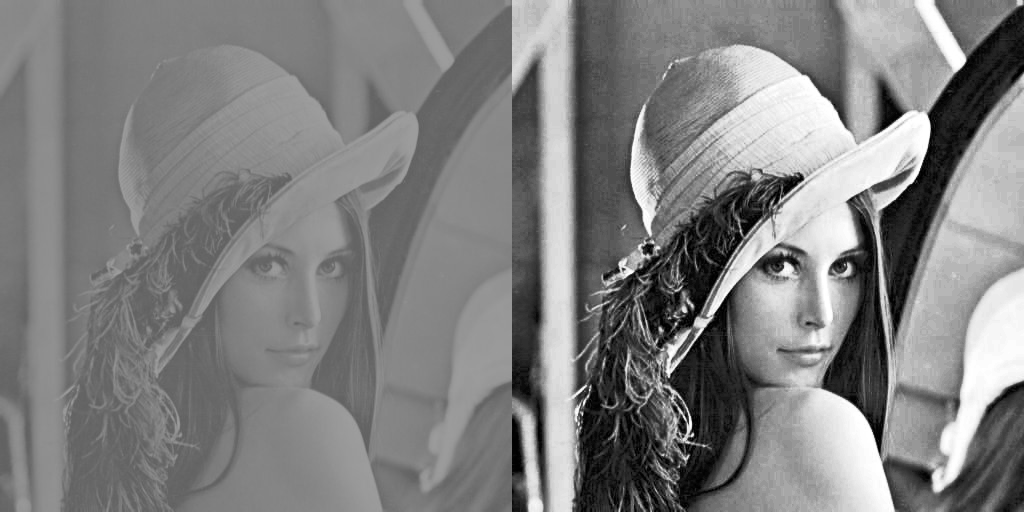

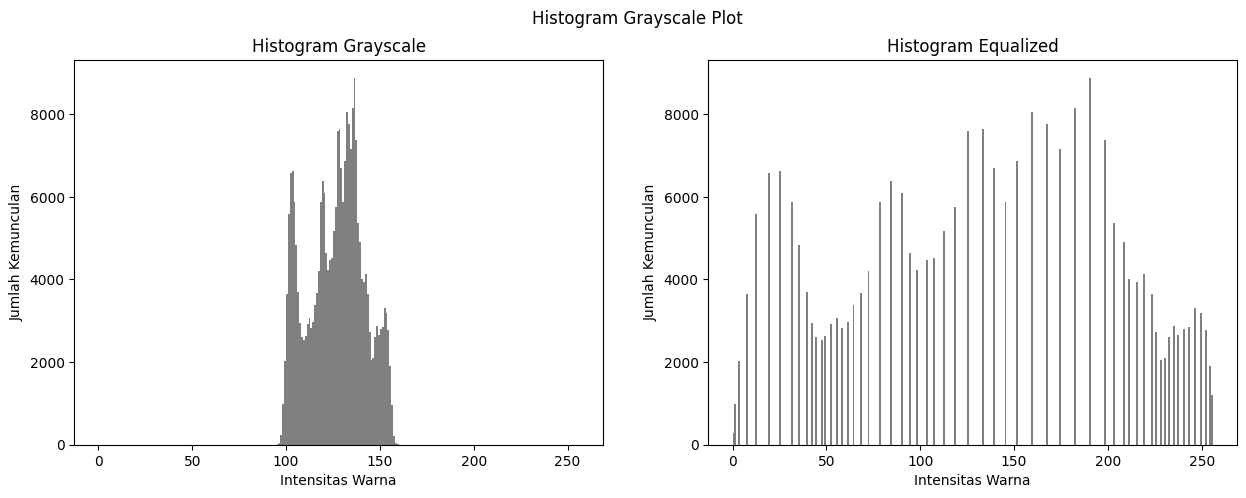

Gambar Dithering Floyd and Steinberg


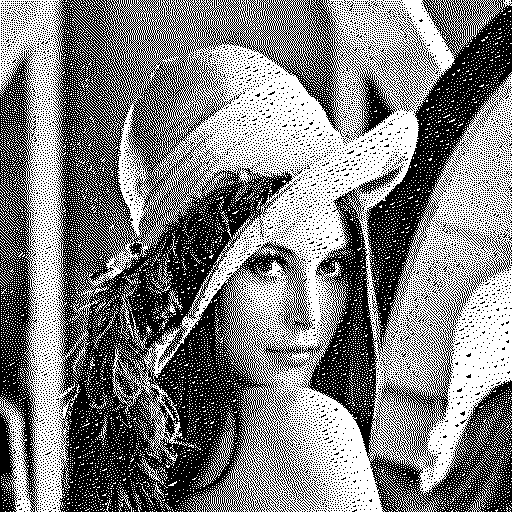

In [ ]:
# 1. Input image
img_lena = cv.imread('/content/drive/MyDrive/Images/Lena_lc.jpg')

# 2. Mengonversi ke Grayscale
img_gray = cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY)

# 3. Histogram Equalization
img_eq = cv.equalizeHist(img_gray)

# 4. Fungsi dithering Floyd-Steinberg
def floyd_steinberg_dithering(img):
        height, width = img.shape
        # Salin citra asli untuk hasil dithering
        dithered_img = img.copy()
        for y in range(height):
            for x in range(width):
                old_pixel = dithered_img[y, x]
                # Menentukan warna piksel
                new_pixel = 255 if old_pixel > 127 else 0
                dithered_img[y, x] = new_pixel
                # Menghitung kesalahan
                quant_error = old_pixel - new_pixel
                # Menyebarkan kesalahan ke piksel yang berdekatan
                if x + 1 < width:
                    dithered_img[y, x + 1] += quant_error * 7 / 16
                if x - 1 >= 0 and y + 1 < height:
                    dithered_img[y + 1, x - 1] += quant_error * 3 / 16
                if y + 1 < height:
                    dithered_img[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width and y + 1 < height:
                    dithered_img[y + 1, x + 1] += quant_error * 1 / 16
        return dithered_img

# 5. Menerapkan dithering pada gambar hasil equalization
dithered_img = floyd_steinberg_dithering(img_eq)

# 6. Menampilkan gambar grayscale dan hasil dithering
final_frame = cv.hconcat((img_gray, img_eq))
cv2_imshow(final_frame)

# 7. Menampilkan histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histogram Grayscale Plot')

# Histogram untuk gambar grayscale
axs[0].hist(img_gray.flatten(), bins=256, range=[0, 256], color='gray')
axs[0].set_title('Histogram Grayscale')
axs[0].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')

# Histogram untuk gambar setelah equalization
axs[1].hist(img_eq.flatten(), bins=256, range=[0, 256], color='gray')
axs[1].set_title('Histogram Equalized')
axs[1].set_xlabel('Intensitas Warna')
axs[1].set_ylabel('Jumlah Kemunculan')

plt.show()


# Gambar Dithering Floyd and Steinberg
print('Gambar Dithering Floyd and Steinberg')
cv2_imshow(dithered_img)